In [1]:
# Import dependencies
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

## **Loading in CSV**

In [2]:
# Read in raw data of test_df from github
url = 'https://raw.githubusercontent.com/eenabow/oscar_nominations/main/data/oscars_df.csv'
test_df = pd.read_csv(url, index_col=None)

In [3]:
test_df.head()

,movie,duration,metascore,gross,awards_nominations,golden_globes_nominated,oscar_nominated
0,Kate & Leopold,118,44.0,47100000.0,4,2,1
1,Chicken Run,84,88.0,106790000.0,11,1,0
2,Fantastic Four,106,40.0,154700000.0,0,0,0
3,Frida,123,61.0,25780000.0,12,2,1
4,The Lord of the Rings: The Fellowship of the Ring,178,92.0,313840000.0,67,4,1


In [4]:
# Will need to remove movie from test_df for actual model 
test_df = test_df[["duration", "metascore", "gross", "awards_nominations", "golden_globes_nominated", "oscar_nominated"]]

## **Random Forest Machine Learning using Randomized search CV** 

In [5]:
# Labels are the values we want to predict
labels = np.array(test_df['oscar_nominated'])

# Remove the labels from the features
# axis 1 refers to the columns
features= test_df.drop('oscar_nominated', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

print(labels)


[1 0 0 ... 1 1 1]


In [6]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [50,250,1000]


# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]""
max_depth = [4,12,20]


max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=10, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(features, labels)



Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   28.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
# Most successful model's parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [27]:
# Accuracy rating
rf_random.best_score_

0.8550347222222222

In [28]:
# Save best parameters as a variable 
rf_best= RandomForestClassifier(bootstrap = True,
 max_depth= 10, max_features= 'sqrt',
 min_samples_leaf= 4,
 min_samples_split= 2,
 n_estimators= 400)

rf_best.fit(features, labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### **Predict whether Nomadland (Won Oscar's Best Picture 2021) would be nominated for the Oscar's based on model**

In [29]:
# Manually enter nomadland features
nomadland_df = pd.DataFrame({
    "duration": [110],
    "metascore": [93],
    "gross": [2143000],
    "awards_nominations": [41], 
    "golden_globes_nominated": [4]
})

In [30]:
# Predict whether Nomadland will be nominated for the Oscars

Y_pred_rf_best = rf_best.predict(nomadland_df)
Y_pred_rf_best

array([1])

**Visualize best parameters of the model and weights of features**

In [31]:
# Save features columns as a list 
columns_list = list(test_df.columns)[0:-1]
columns_list

['duration',
 'metascore',
 'gross',
 'awards_nominations',
 'golden_globes_nominated']

In [32]:
# Export the SAV machine learning file 
import joblib

joblib.dump(rf_best, "random_forest_oscars.sav")

['random_forest_oscars.sav']

In [33]:
rf_best.fit(features, labels)
# Find the weights of each feature and how they impact the score
feature_imp = pd.Series(rf_best.feature_importances_,index=columns_list).sort_values(ascending=False)
feature_imp

awards_nominations         0.388239
metascore                  0.229608
gross                      0.161203
golden_globes_nominated    0.144398
duration                   0.076552
dtype: float64

No handles with labels found to put in legend.


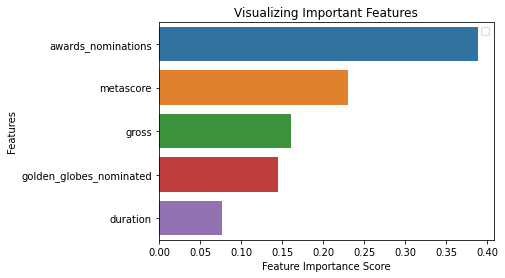

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()